1.	Sharpen the following image by applying the following and find out which one is better: 
a)	Unsharp Masking
b)	High Boost Filtering


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img = cv2.imread('/kaggle/input/lab-05-dataset/lab_05/Picture1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [23]:

blurred = cv2.GaussianBlur(img, (5, 5), 0)

# -----------------------------
# (a) Unsharp Masking
# -----------------------------

In [4]:
unsharp_mask = cv2.addWeighted(src1=img, alpha=1.5, src2=blurred, beta=-0.5, gamma=0)

# -----------------------------
# (b) High Boost Filtering
# -----------------------------

In [5]:
A = 2.0  # Amplification factor
high_boost = cv2.addWeighted(src1=img, alpha=A, src2=blurred, beta=-(A - 1), gamma=0)

# -----------------------------
# Display Results
# -----------------------------

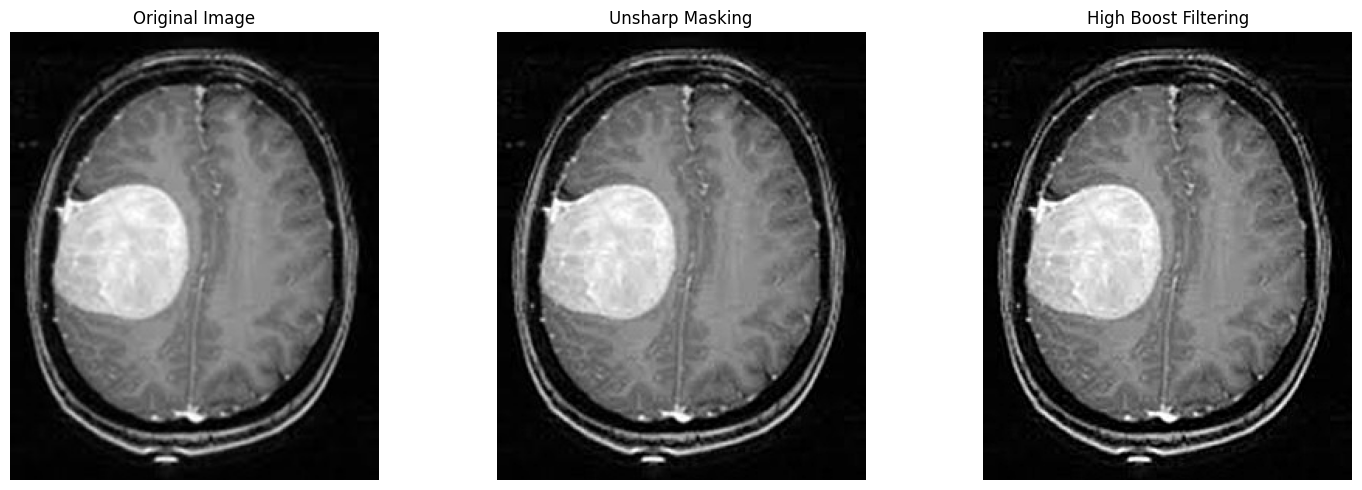

In [6]:
titles = ['Original Image', 'Unsharp Masking', 'High Boost Filtering']
images = [img, unsharp_mask, high_boost]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Tunning Practices

just change the alpha value 1.5 to 2

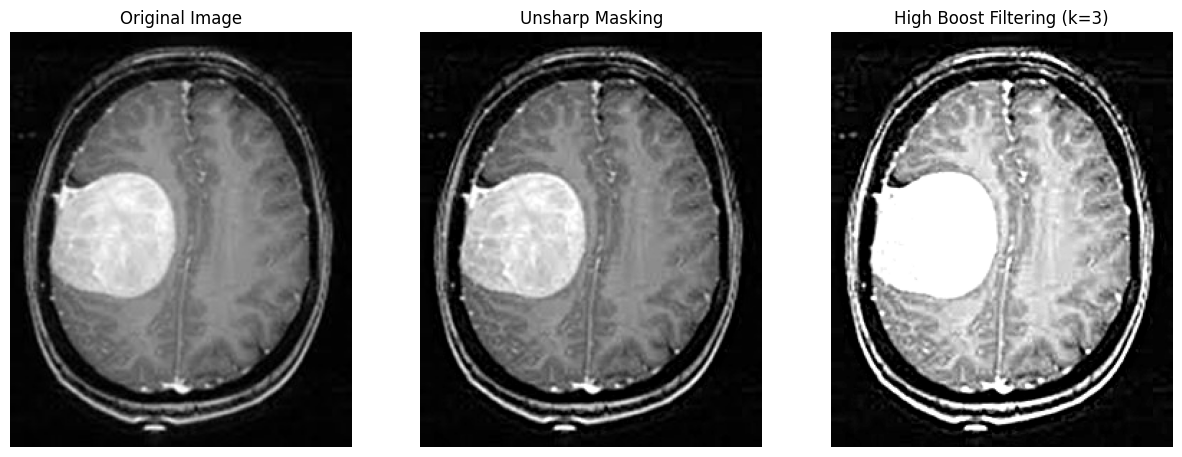

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/kaggle/input/lab-05-dataset/lab_05/Picture1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
# Unsharp Masking
blurred = cv2.GaussianBlur(img, (0, 0), 3) 
unsharp_mask = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)  
# High Boost Filtering (k=2)
high_boost = cv2.addWeighted(img, 3, blurred, -1.5, 0)  

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(unsharp_mask)
plt.title('Unsharp Masking')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_boost)
plt.title('High Boost Filtering (k=3)')
plt.axis('off')

plt.show()

2.	Sharpen the following image using the concept of Laplacian Filtering. 

In [7]:
img = cv2.imread('/kaggle/input/lab-05-dataset/lab_05/Picture2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Laplacian filter

In [8]:
laplacian = cv2.Laplacian(img_gray, ddepth=cv2.CV_64F, ksize=3)
laplacian = np.uint8(np.absolute(laplacian))  

In [9]:
sharpened = cv2.add(img_gray, laplacian)

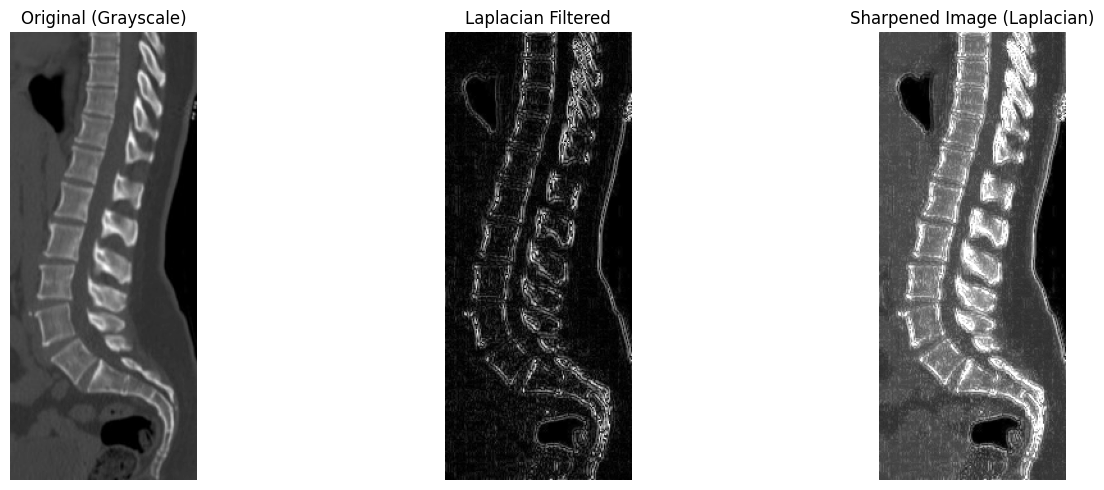

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image (Laplacian)')
plt.axis('off')
plt.tight_layout()
plt.show()


3.	Use Roberts-cross, Sobel, and Prewitt operators to detect the edge of the following image. 

In [11]:
from scipy.ndimage import convolve

In [12]:
img = cv2.imread('/kaggle/input/lab-05-dataset/lab_05/Picture3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ----------------------------------------
# 1. ROBERTS CROSS OPERATOR
# ----------------------------------------

In [13]:
roberts_cross_v = np.array([[1, 0],
                            [0, -1]], dtype=int)
roberts_cross_h = np.array([[0, 1],
                            [-1, 0]], dtype=int)

roberts_v = convolve(gray, roberts_cross_v)
roberts_h = convolve(gray, roberts_cross_h)
roberts = np.sqrt(roberts_v**2 + roberts_h**2)
roberts = np.uint8(np.clip(roberts, 0, 255))

# ----------------------------------------
# 2. SOBEL OPERATOR (built-in)
# ----------------------------------------

In [14]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobelx**2 + sobely**2)
sobel = np.uint8(np.clip(sobel, 0, 255))

# ----------------------------------------
# 3. PREWITT OPERATOR
# ----------------------------------------

In [15]:
prewitt_kernelx = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=int)
prewitt_kernely = np.array([[1, 1, 1],
                            [0, 0, 0],
                            [-1, -1, -1]], dtype=int)

prewittx = convolve(gray, prewitt_kernelx)
prewitty = convolve(gray, prewitt_kernely)
prewitt = np.sqrt(prewittx**2 + prewitty**2)
prewitt = np.uint8(np.clip(prewitt, 0, 255))

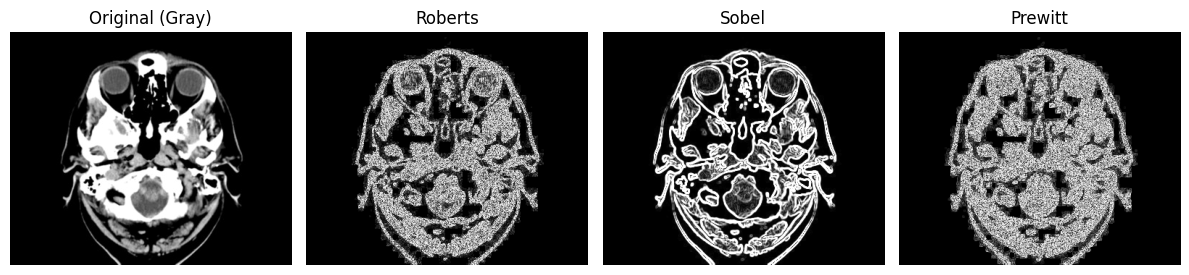

In [17]:
titles = ['Original (Gray)', 'Roberts', 'Sobel', 'Prewitt']
images = [gray, roberts, sobel, prewitt]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

4.	Show performance comparison among High Boost, Unsharp, Laplacian Roberts-cross, Sobel, Prewitt and Canny filtering for edge detection – find out which one is better for the given image.

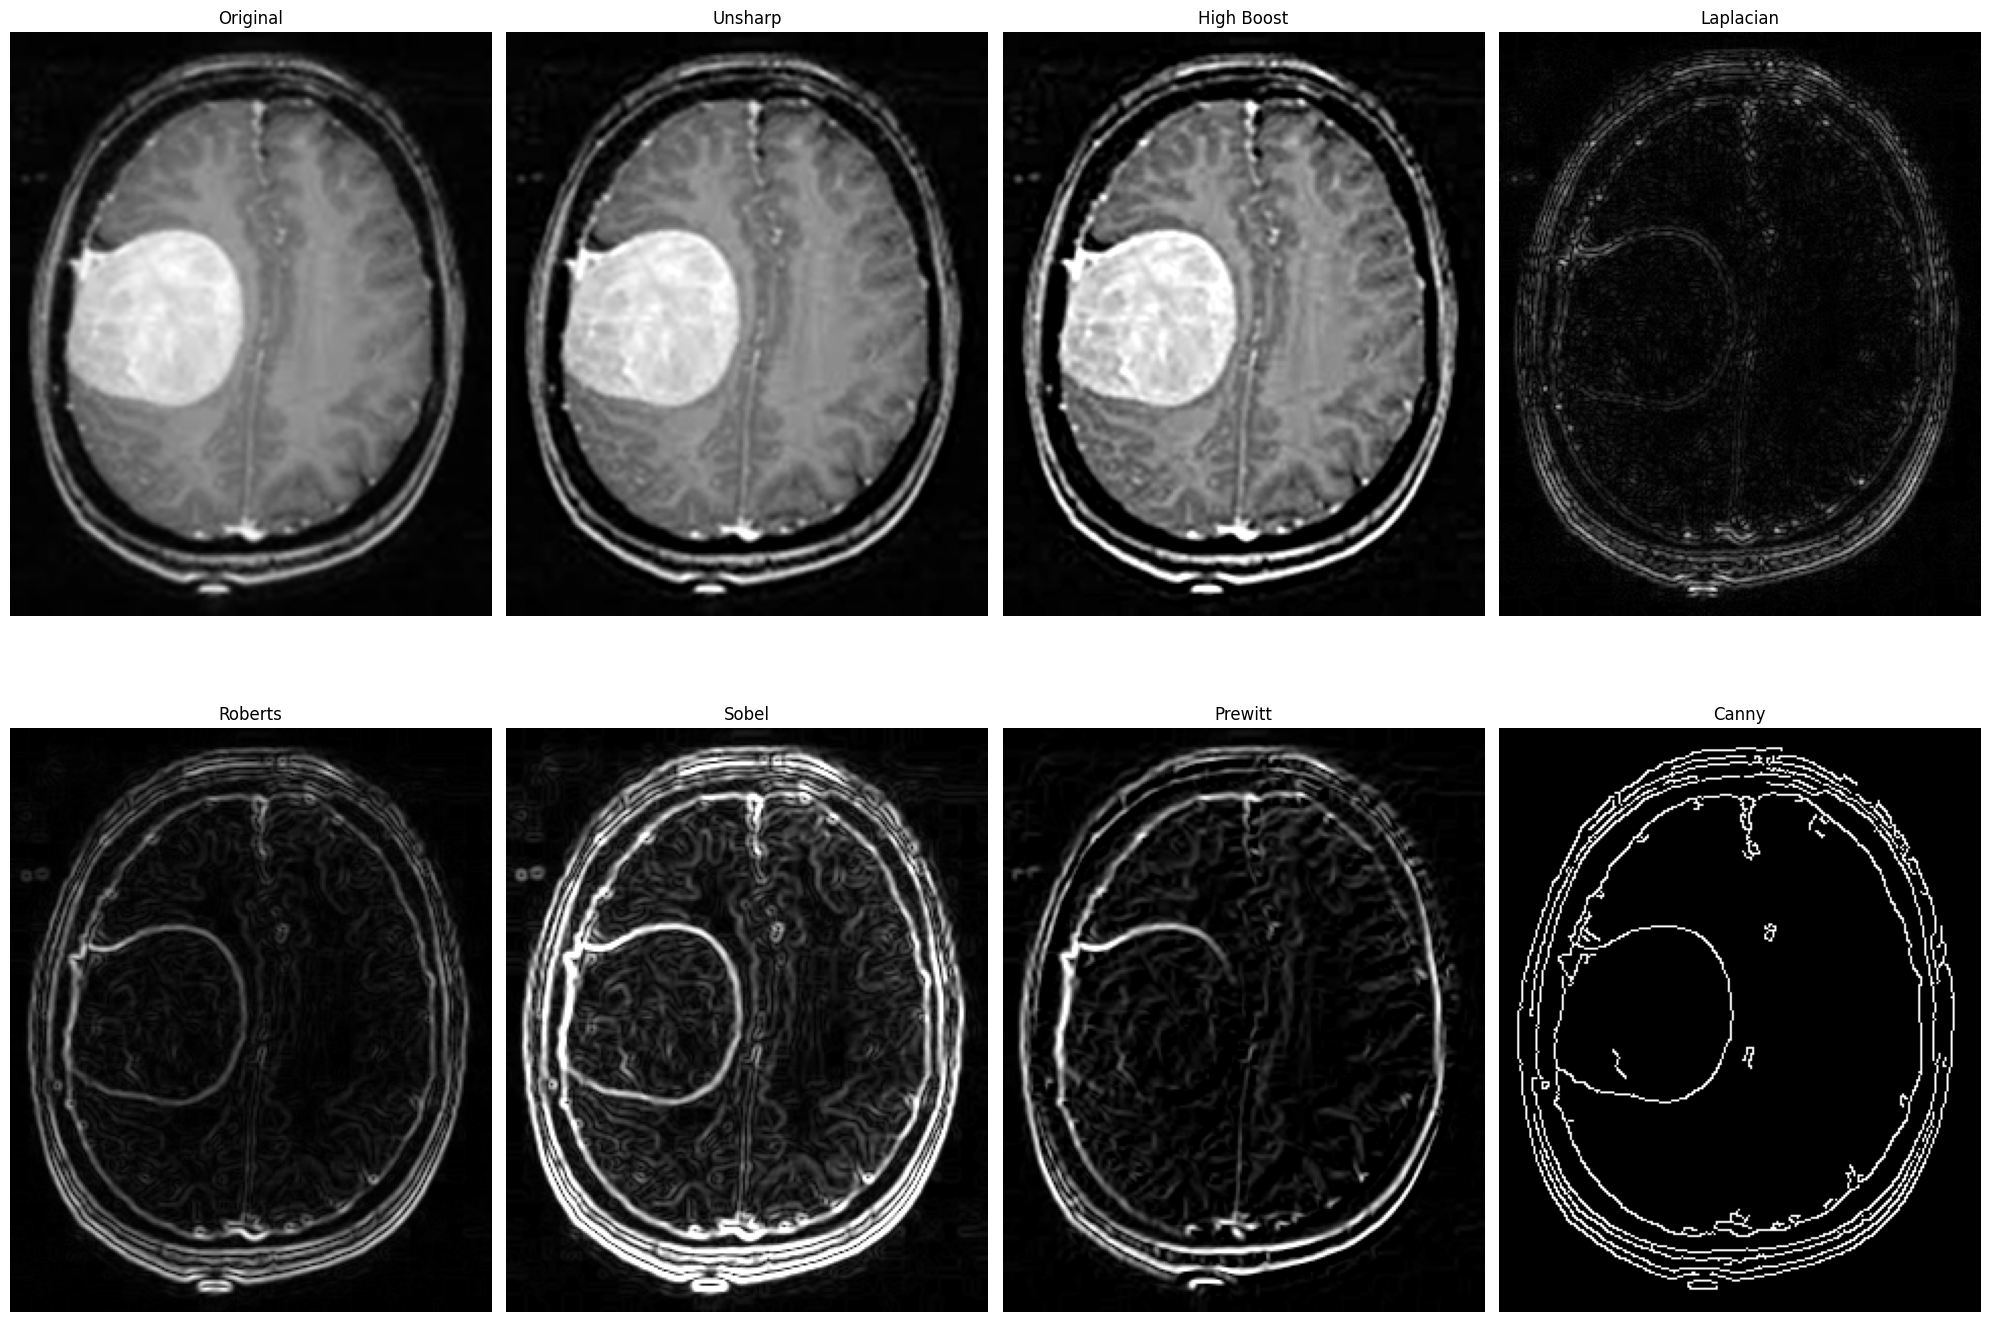

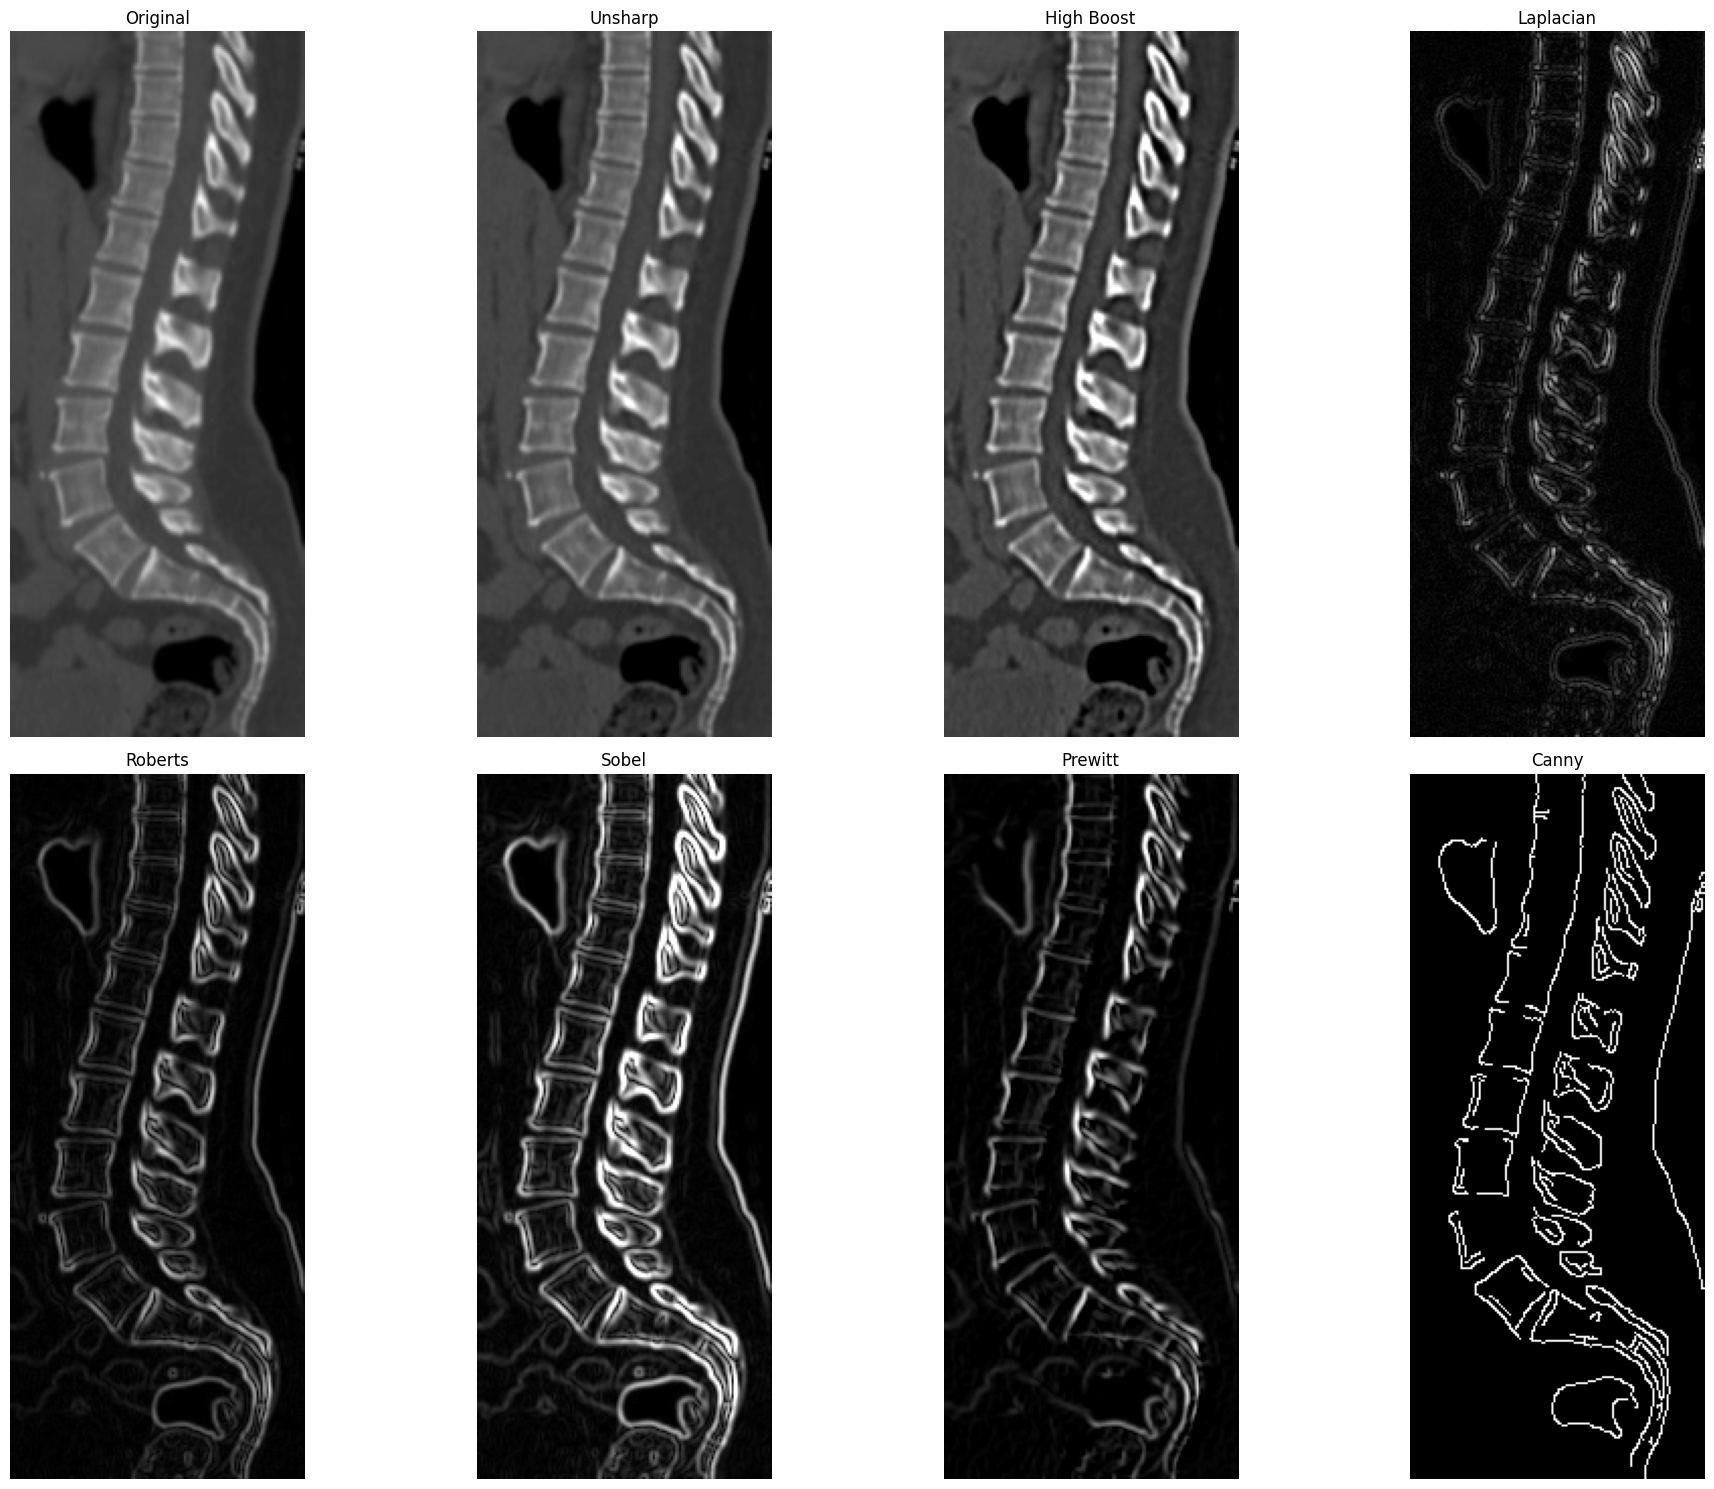

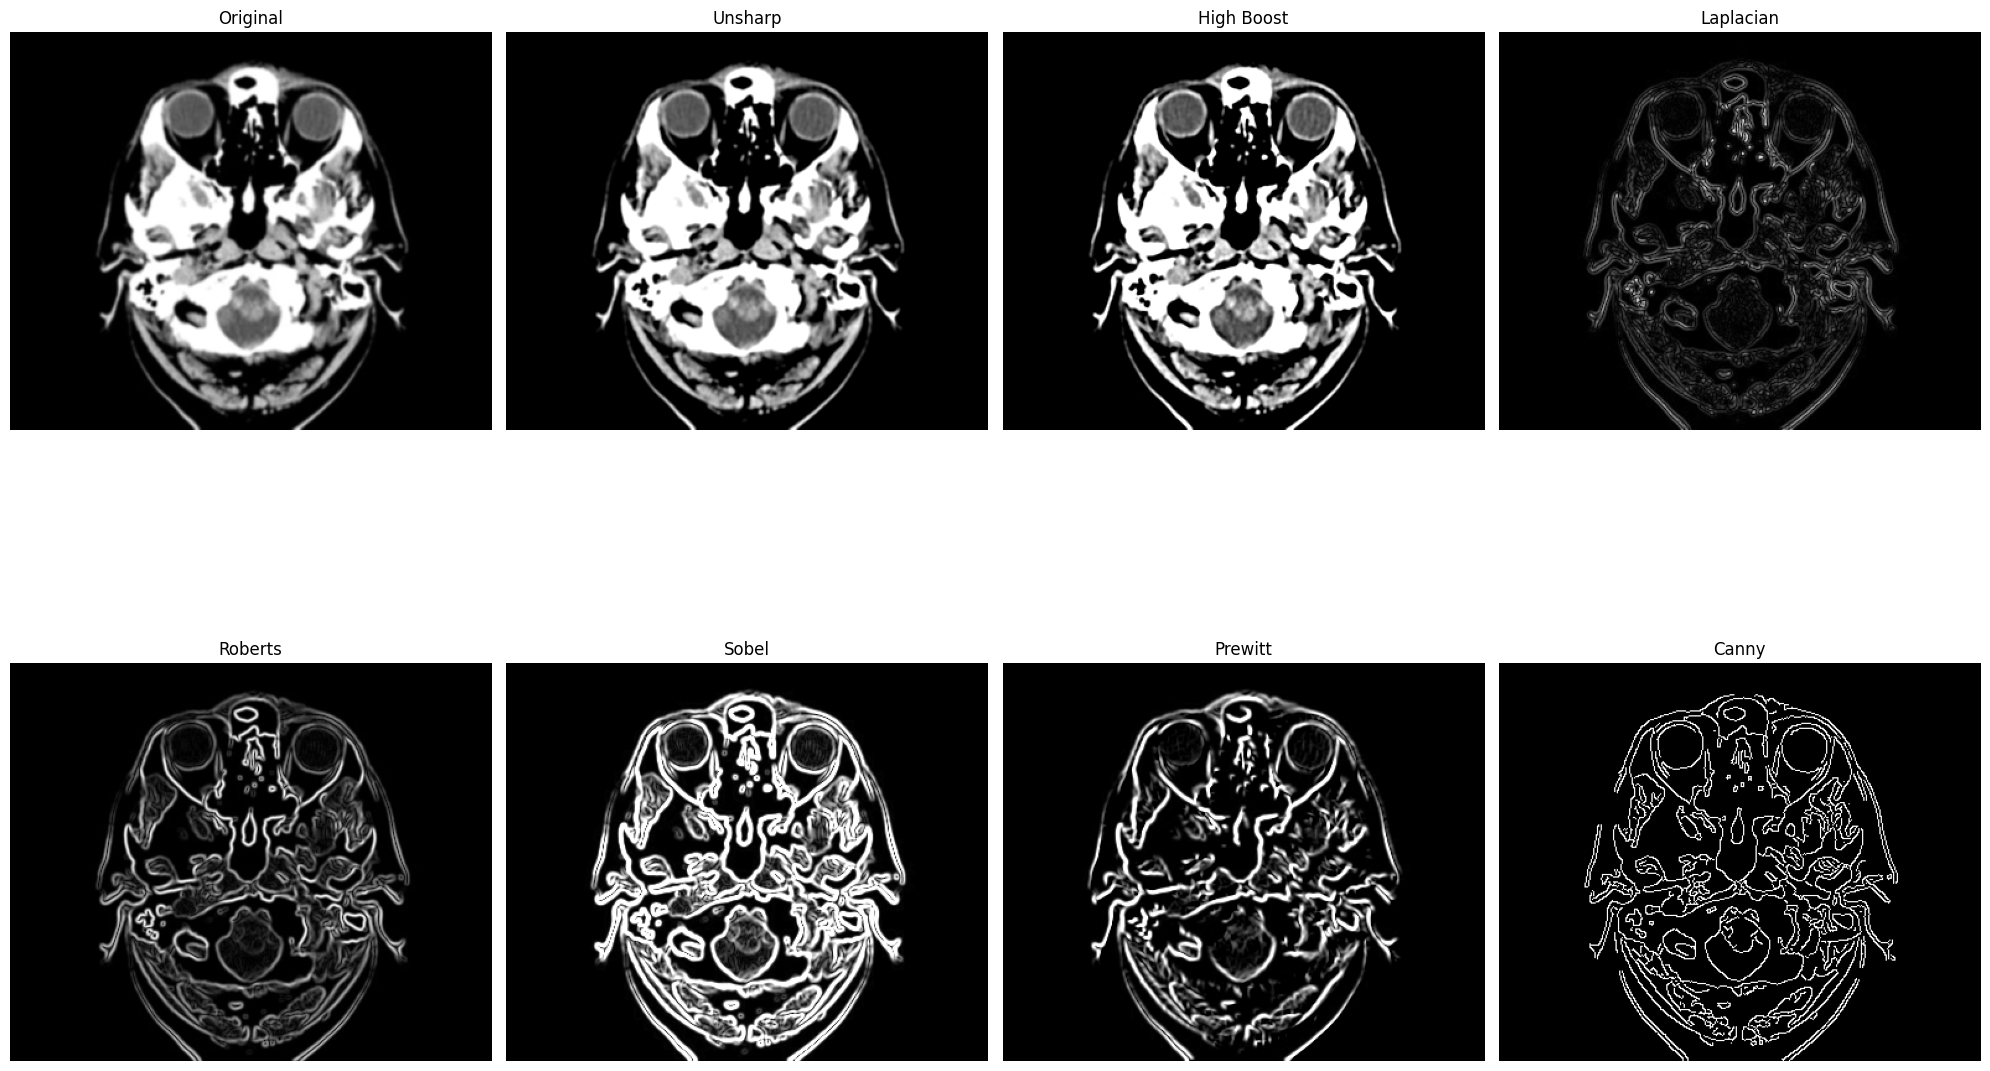

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def apply_edge_detectors(image_path):
    img_name = os.path.splitext(os.path.basename(image_path))[0]  # e.g., 'Picture1'
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Sharpening
    blurred = cv2.GaussianBlur(img, (0, 0), 3)
    unsharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    high_boost = cv2.addWeighted(img, 2.5, blurred, -1.5, 0)

    # Laplacian
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    # Roberts
    kx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    ky = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robertsx = cv2.filter2D(img, cv2.CV_64F, kx)
    robertsy = cv2.filter2D(img, cv2.CV_64F, ky)
    roberts = np.sqrt(robertsx**2 + robertsy**2)
    roberts = np.uint8(np.clip(roberts, 0, 255))

    # Sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))

    # Prewitt
    prewittx = cv2.filter2D(img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitty = cv2.filter2D(img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt = np.sqrt(prewittx.astype(float)**2 + prewitty.astype(float)**2)
    prewitt = np.uint8(np.clip(prewitt, 0, 255))

    # Canny
    canny = cv2.Canny(img, 100, 200)

    # Save to /kaggle/working/
    save_dir = "/kaggle/working/"
    results = {
        "unsharp": unsharp,
        "high_boost": high_boost,
        "laplacian": laplacian,
        "roberts": roberts,
        "sobel": sobel,
        "prewitt": prewitt,
        "canny": canny
    }

    for key, image in results.items():
        save_path = os.path.join(save_dir, f"{img_name}_{key}.jpg")
        cv2.imwrite(save_path, image)

    # Optional: show
    plt.figure(figsize=(20, 15))
    titles = ["Original", "Unsharp", "High Boost", "Laplacian", "Roberts", "Sobel", "Prewitt", "Canny"]
    images = [img, unsharp, high_boost, laplacian, roberts, sobel, prewitt, canny]

    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run on all images
apply_edge_detectors("/kaggle/input/lab-05-dataset/lab_05/Picture1.jpg")
apply_edge_detectors("/kaggle/input/lab-05-dataset/lab_05/Picture2.jpg")
apply_edge_detectors("/kaggle/input/lab-05-dataset/lab_05/Picture3.jpg")
